In [30]:
# En este trabajo práctico, vamos a tratar de analizar el ruido que puede aparecer en una fotografia.


# Importamos las bibliotecas a utilizar
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# Para anlizar el ruido de nuestra camara, lo que hacemos es sacar varias fotos con el lente tapado
# Con el objetivo de obtener una imagen 100% oscura.


# Cargamos en una lista todas las fotos tomadas, en este caso con la camara de un celular OnePlus 3T.

from glob import glob
img_lista = glob('./Fotos_negras/*.jpg')

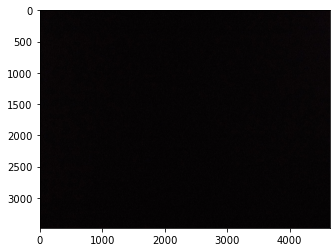

In [59]:
# Mostramos una imagen cualquiera para ver si efectivamente se ve toda negra.

img_num  = 1  # Podemos poner el numero de imagen que nos interesa ver.
img = cv2.cvtColor(cv2.imread(img_lista[img_num -1]), cv2.COLOR_BGR2RGB) # Leemos la imagen en color

plt.imshow(img);

In [60]:
# Si no existiera ruido, y el lente estuviera correctamente tapado, esperariamos que todos los pixeles tengan una intensidad de 0
# Para corroborar buscamos los valores máximos y mínimos de intensidad para esta foto

print("Menor intensidad =", np.min([img]))
print("Mayor intensidad =", np.max([img]))

Menor intensidad = 0
Mayor intensidad = 70


Mayor intensidad = 255


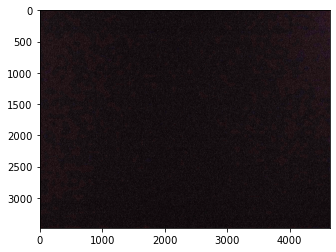

In [61]:
# Vemos que hay pixeles que tienen un brillo diferente de cero, llegando en almenos uno a un valor de 70.

# Para evidenciar aun mas esto, podemos pintar todos los pixeles que tengan un valor distinto a 0 de blanco (255)

img_norm = cv2.normalize(img, 0, 255, norm_type=cv2.NORM_INF)
print("Mayor intensidad =", np.max([img_norm]))

plt.imshow(img_norm);

In [ ]:
# En esta imagen ahora se evidencia mucho mas lo supuesto

In [62]:
# Creamos una función que lea todas las fotos, y las ponga de forma horizontal. 
# Como pueden llegar a ser muchas fotos de gran tamaño, lo que ocuparia mucha memoria y tiempo de procesamiento, 
# usamos un python generators, para no ocupar tanto espacio de memoria y que solo procese las imagenes caundo se lo requiera.

def leer(img):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img.shape[0] > img.shape[1]:
        img = cv2.transpose(img)
    return img

# Ahora vamos a hacer un promedio de la intensidad de todas las fotos, pixel a pixel


imgs = (leer(img) for img in img_lista)

img_promedio = np.zeros_like(img)

for img in imgs:
    img_promedio += img
    
img_promedio = img_promedio//len(img_lista)

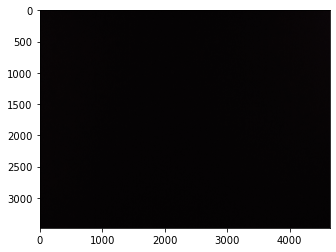

In [63]:
plt.imshow(img_promedio);

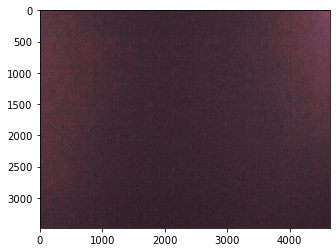

In [64]:
# si mostramos la imagen, vemos que a simple vista sigue siendo toda negra, por eso volvemos a normalizarla

img_promedio_norm = cv2.normalize(img_promedio, 0, 255, norm_type=cv2.NORM_INF)

plt.imshow(img_promedio_norm);

In [ ]:
# Ahora se puede ver que el ruido promedio es muy evidente, y que no es homogeno en toda la imagen,
# sino que aparecen mucho mas en los laterales de la foto.

In [65]:
# Ahora nos interesa saber como es la distrubición de los valores de intensidad pixel a pixel entre cada una de las fotos,
# Para eso creamos un nuevo vector donde vamos calculando la media y la desviación estandar para cada pixel.

def leer(img):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img.shape[0] > img.shape[1]:
        img = cv2.transpose(img)
    return img
    
imgs = (leer(img) for img in img_lista)

imgs_np = np.stack(list(imgs))

In [66]:
# Media:
img_media = np.mean(imgs_np, axis=0)

# desvío:
img_std = np.std(imgs_np, axis=0)

(11, 3480, 4640, 3)


In [68]:
# Para analizar los resultados podemos graficarlos separado color por color, y para cada uno ver la media y el desvío
# En cada zona de la foto.


def dibujar_contorno(mat):
    fig = plt.figure()
    X, Y = np.meshgrid(range(img_media.shape[1]), range(img_media.shape[0]))
    Z = mat

    dec = 16

    fig = plt.figure(figsize=(16,12))
    cp = plt.contourf(X[::dec], Y[::dec], Z[::dec])
    fig.colorbar(cp)
    plt.show()

Std Rojo


<Figure size 432x288 with 0 Axes>

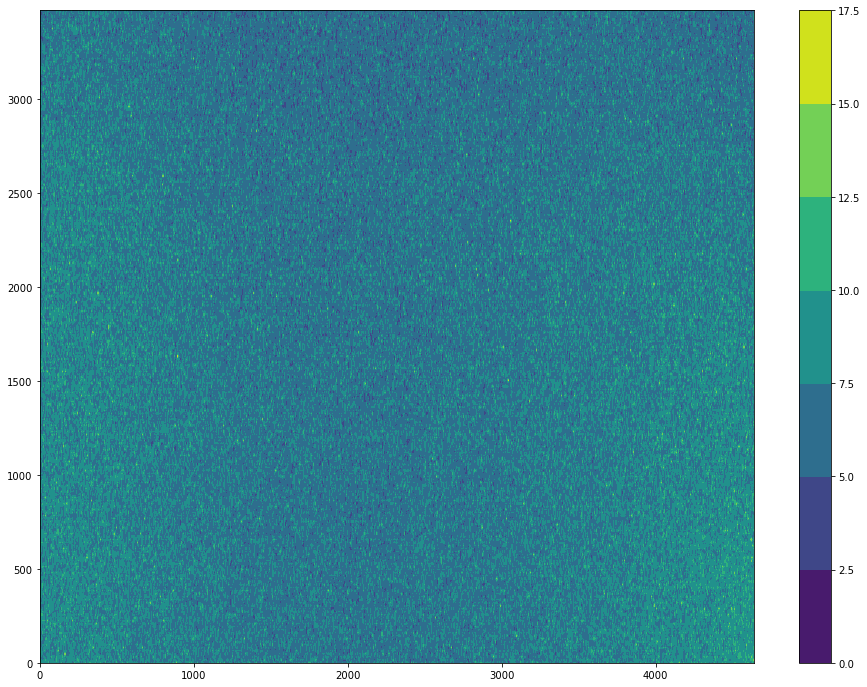

In [69]:
print('Std Rojo')
dibujar_contorno(img_std[:,:,0]);

Std Verde


<Figure size 432x288 with 0 Axes>

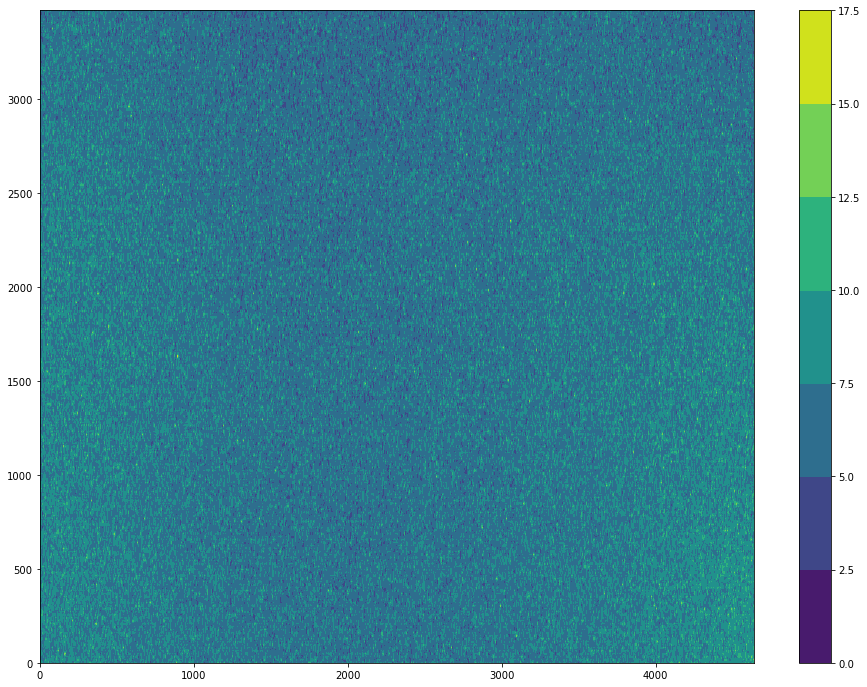

In [70]:
print('Std Verde')
dibujar_contorno(img_std[:,:,1]);

Std Azul


<Figure size 432x288 with 0 Axes>

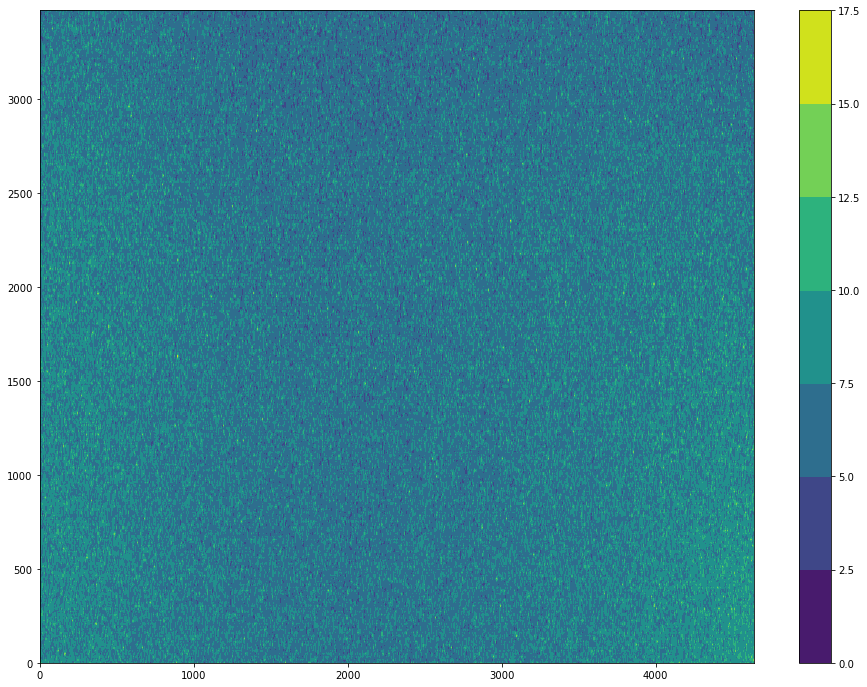

In [71]:
print('Std Azul')
dibujar_contorno(img_std[:,:,2]);

Media Rojo


<Figure size 432x288 with 0 Axes>

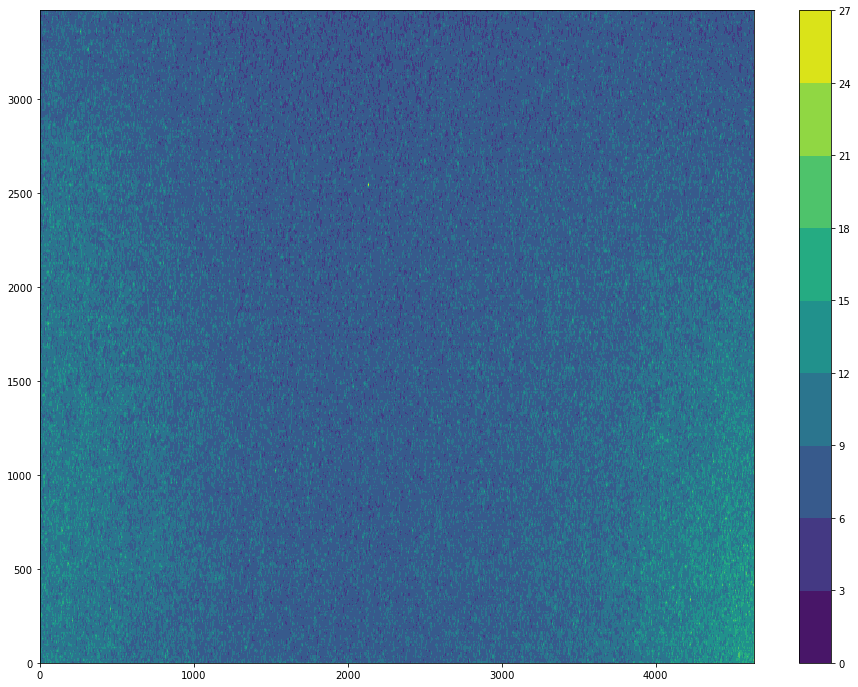

In [72]:
print('Media Rojo')
dibujar_contorno(img_media[:,:,0]);

Media Verde


<Figure size 432x288 with 0 Axes>

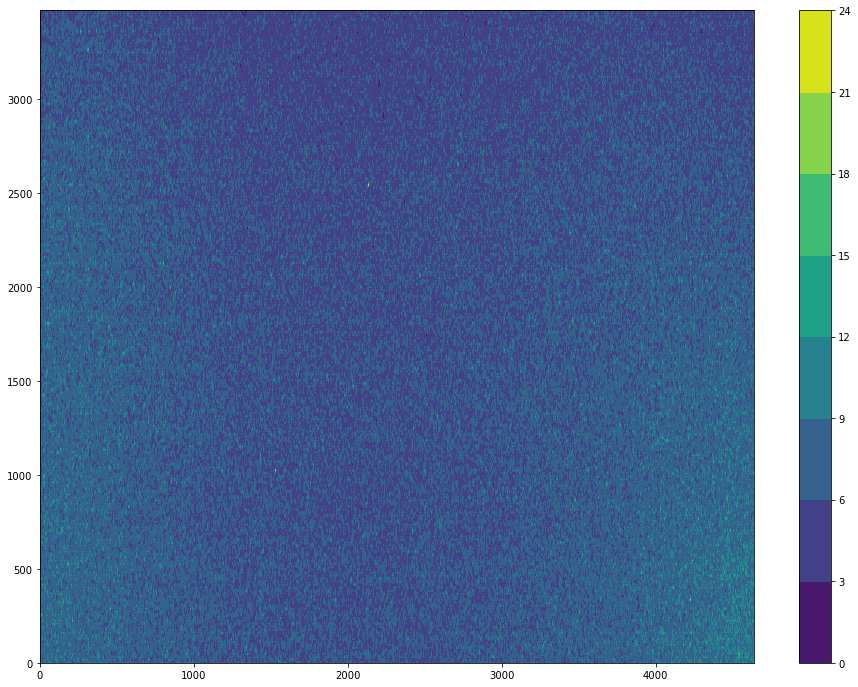

In [73]:
print('Media Verde')
dibujar_contorno(img_media[:,:,1]);

Media Azul


<Figure size 432x288 with 0 Axes>

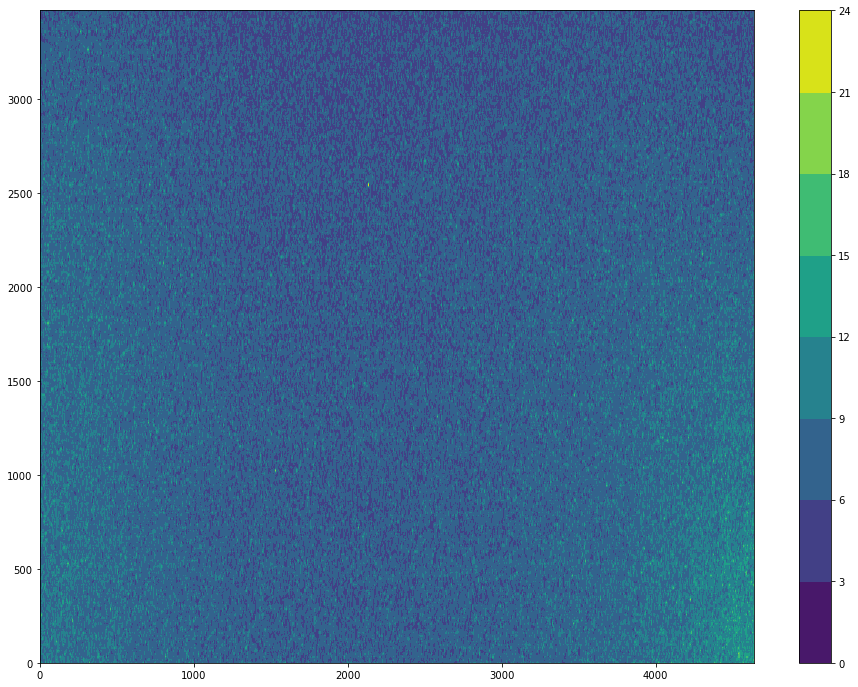

In [74]:
print('Media Azul')
dibujar_contorno(img_media[:,:,2]);

In [ ]:
# Analizando las gráficas, vemos que para los tres colores, el desvio estandar es mas o menos homogéneo
# en toda las zonas, sin embargo cuando vemos la media apreciamos claramente claramente que toma valores mucho 
# mas elevados en los laterales, como ya habiamos visto en la imagen normalizada.

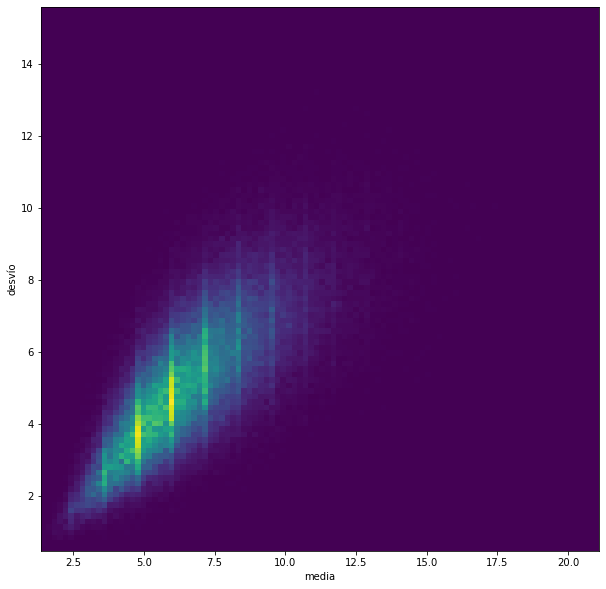

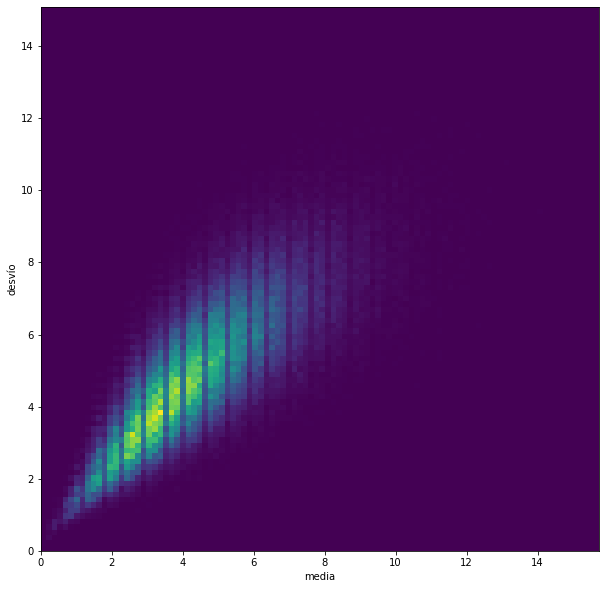

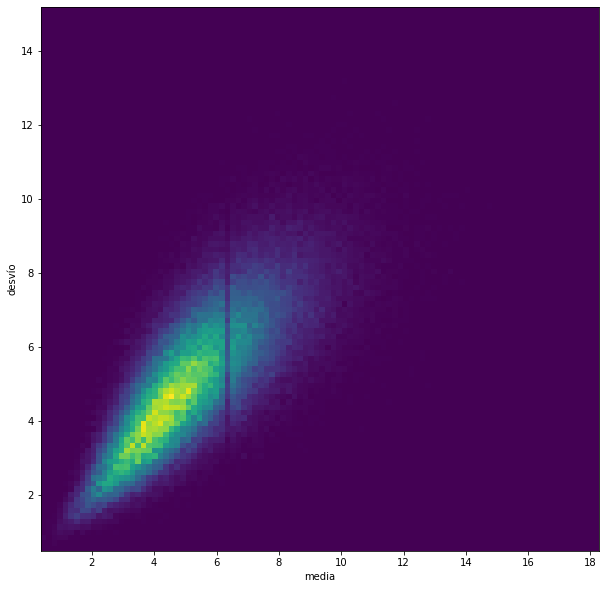

In [75]:
# Por último, podemos ver globalmente para cada color

dec = 100

todos_los_rojos_std = np.ravel(img_std[:,:,0])
todos_los_rojos_media = np.ravel(img_media[:,:,0])

todos_los_verdes_std = np.ravel(img_std[:,:,1])
todos_los_verdes_media = np.ravel(img_media[:,:,1])

todos_los_azules_std = np.ravel(img_std[:,:,2])
todos_los_azules_media = np.ravel(img_media[:,:,2])

plt.figure(figsize=(10,10))
plt.xlabel('media')
plt.ylabel('desvío')
cb = plt.hist2d(todos_los_rojos_media[::dec], todos_los_rojos_std[::dec], bins=100)


plt.figure(figsize=(10,10))
plt.xlabel('media')
plt.ylabel('desvío')
cb = plt.hist2d(todos_los_verdes_media[::dec], todos_los_verdes_std[::dec], bins=100)

plt.figure(figsize=(10,10))
plt.xlabel('media')
plt.ylabel('desvío')
cb = plt.hist2d(todos_los_azules_media[::dec], todos_los_azules_std[::dec], bins=100)

In [ ]:
# Es llamativo los patrones que surgen de estas gráficas, donde para cada color aparecen claras franjas donde los valores 
# son mucho mayores o mucho menores que en las zonas cercanas.

# No tenemos una explicación clara de porque puede llegar a suceder esto, mas que algun problema en el procesamiento de las imagenes.



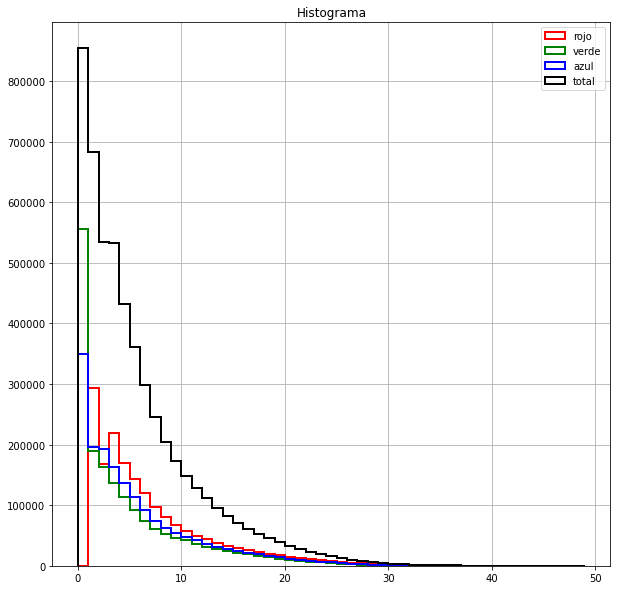

In [76]:
# También podemos hacer un histograma de la distribución del brillo total para cada uno de los colores.

dec = 100
plt.figure(figsize=(10,10))
plt.title('Histograma')
todos_los_rojos = np.ravel(imgs_np[:,:,:,0])
todos_los_verdes = np.ravel(imgs_np[:,:,:,1])
todos_los_azules = np.ravel(imgs_np[:,:,:,2])
plt.grid()
i_max = 50
_ = plt.hist(todos_los_rojos[::dec], bins=range(i_max), color='red',histtype='step', linewidth=2.0)
_ = plt.hist(todos_los_verdes[::dec], bins=range(i_max), color='green', histtype='step', linewidth=2.0)
_ = plt.hist(todos_los_azules[::dec], bins=range(i_max), color='blue', histtype='step', linewidth=2.0)

_ = plt.hist(np.ravel(imgs_np)[::dec], bins=range(i_max), color='black', histtype='step', linewidth=2.0)
plt.legend(['rojo', 'verde', 'azul', 'total'])

In [ ]:
# Como era de esperar, el pico esta muy cercano al 0. Sin embargo no tiene una distrubución similar a la distrubución normal.
# Lo que significa que el modelo que se propuso inicialmente para simular el ruido dista de lo que encontramos en nuestra camara.